# Bayesian Linear Regression: Maths score
Using Machine Learning to predict student grades

Data:

Eploration student performance data collected from a Portuguese secondary (high) school. The data includes personal and academic characteristics of students along with final class grades. Objective will be to create a model that can predict grades based on the student’s information. This dataset, along with many other useful ones for testing models or trying out data science techniques, is available on the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/student+performance



NEXT READ
https://github.com/WillKoehrsen/ai-projects
and do a project on Bayesian linear regression


book in Python
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers


FROM PROJECT
https://github.com/WillKoehrsen/ai-projects/blob/master/bayesian_lm/Bayesian%20Linear%20Regression.ipynb

better copy of same thing:
https://github.com/divik544/Marks-Predictor/blob/master/Project.ipynb



Good book:
https://statswithr.github.io/book/introduction-to-bayesian-regression.html in R

Which metrics is better MAE or RMSE
https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#Read data
student = pd.read_csv('student/student-mat.csv')
student.head(3)    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,22,6,6,4
1,GP,M,17,U,GT3,T,3,2,services,services,...,5,5,5,2,4,5,16,6,5,5
2,GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,8,6,5


In [45]:
#just an extra check 
# Filter out grades that were 0, just to check if had any missing values
#looks ok, shape with and without is the same
df_check = student[~(student['G3'].isin([0, 1]))]
df_check.shape

(357, 33)

Data description:
##### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

##### these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets . 
These students can be identified by searching for identical attributes
that characterize each student, as shown in the annexed R file.


In [2]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.268908,11.358543,11.523810
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.240450,3.147188,3.227797
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,4.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
student.shape

(357, 33)

In [4]:
student['G3'].describe()

count    357.000000
mean      11.523810
std        3.227797
min        4.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [5]:
student['G3'].value_counts()

10    56
11    47
15    33
8     32
12    31
13    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

### Distribution (histogram) of students final grades

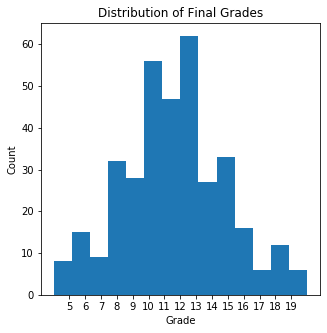

In [6]:
# stats of 395 students
#lets look at distrubution of final grades G3

# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (5, 5)
# Histogram of grades
plt.hist(student['G3'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')
plt.xticks(list(range(5, 20)));


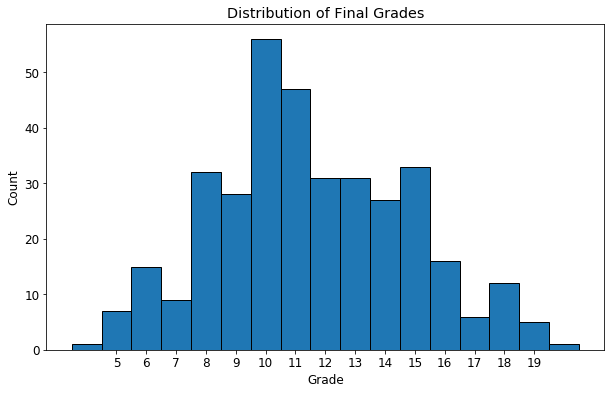

In [47]:
#or a bar plot
plt.bar(student['G3'].value_counts().index, 
        student['G3'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades');
plt.xticks(list(range(5, 20)));

### Density plot Final Grades vs Location of students (Rural/Urban)
in seaborn

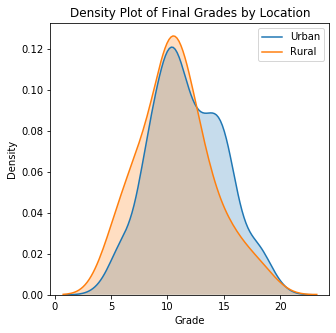

In [7]:
import seaborn as sns

# Grade distribution by address
sns.kdeplot(student.loc[student['address'] == 'U', 'G3'], label = 'Urban', shade = True)
sns.kdeplot(student.loc[student['address'] == 'R', 'G3'], label = 'Rural', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

### Density plot by parent cohabitation status
Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)


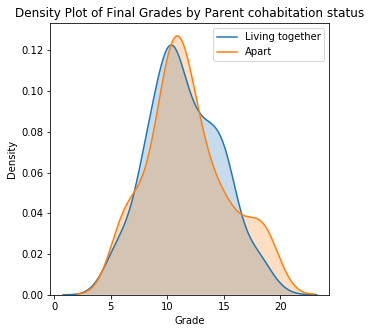

In [8]:
# Grade distribution by address
sns.kdeplot(student.loc[student['Pstatus'] == 'T', 'G3'], label = 'Living together', shade = True)
sns.kdeplot(student.loc[student['Pstatus'] == 'A', 'G3'], label = 'Apart', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Parent cohabitation status');

### Distibution of Final Grades by School
school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

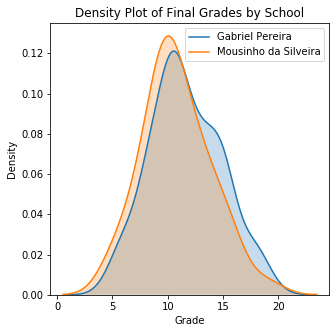

In [9]:
# Grade distribution by address
sns.kdeplot(student.loc[student['school'] == 'GP', 'G3'], label = 'Gabriel Pereira', shade = True)
sns.kdeplot(student.loc[student['school'] == 'MS', 'G3'], label = 'Mousinho da Silveira', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by School');

In [10]:
#distribution of school by adress:
schools=student.groupby(['school'])['address'].value_counts()
schools

school  address
GP      U          259
        R           56
MS      R           22
        U           20
Name: address, dtype: int64

### Correlations  for feature selection

Since every variable will not be related to the final grade, so we need to perform feature selection(or dimensionality reduction) to chose only the "relevant" variables. Correlation Coefficient can be used to determine the most useful variables for predicting a grade.

First for numerical values
Than for categorical



In [11]:
# Correlations of numerical values
student.corr()['G3'].sort_values()

failures     -0.293831
absences     -0.213129
Walc         -0.190054
goout        -0.177383
Dalc         -0.140690
age          -0.140372
traveltime   -0.099785
health       -0.081691
freetime     -0.021589
famrel        0.037711
studytime     0.126728
Fedu          0.158811
Medu          0.190308
G1            0.891805
G2            0.965583
G3            1.000000
Name: G3, dtype: float64

In [12]:
#correlation for categorical features
category_df = student.select_dtypes('object')
# One hot encode the variables  0 or 1
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['G3'] = student['G3']
#print categorical features
dummy_df.head(3)

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,0,1,0,1,4
1,1,0,0,1,0,1,1,0,0,1,...,1,0,1,0,1,0,1,1,0,5
2,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,5


In [13]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['G3'].sort_values()

schoolsup_yes       -0.238365
Mjob_other          -0.142541
address_R           -0.130090
higher_no           -0.113419
internet_no         -0.111624
sex_F               -0.102448
Mjob_at_home        -0.090624
school_MS           -0.083615
Fjob_other          -0.081502
guardian_other      -0.069491
famsup_yes          -0.067305
activities_no       -0.058600
reason_course       -0.050918
romantic_yes        -0.049944
famsize_GT3         -0.039744
paid_yes            -0.028899
Pstatus_T           -0.026665
nursery_no          -0.026541
Fjob_services       -0.018154
reason_other        -0.003897
reason_home          0.000372
Fjob_health          0.006241
guardian_mother      0.007728
nursery_yes          0.026541
Pstatus_A            0.026665
paid_no              0.028899
Fjob_at_home         0.028954
guardian_father      0.035220
famsize_LE3          0.039744
Mjob_teacher         0.045390
romantic_no          0.049944
reason_reputation    0.056573
activities_yes       0.058600
famsup_no 

### Selection for train and test data from 7 more correlated variables
### Feature selection

In [14]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


def format_data(student):
    # Targets are final grade of student
    labels = student['G3']
    
    # Drop the school and the grades from features
    student = student.drop(columns=['school', 'G1', 'G2'])
    
    # One-Hot Encoding of Categorical Variables
    student = pd.get_dummies(student)
    
    # Find correlations with the Grade and sort in descending order
    most_correlated = student.corr().abs()['G3'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:7]
    
    #drop all other variables apart from top 6
    student = student.loc[:, most_correlated.index]
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(student, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

#### select data for modeling
X_train, X_test, y_train, y_test = format_data(student)
X_train.head(10)

,G3,failures,schoolsup_yes,schoolsup_no,absences,Medu,Walc
60,8,3,0,1,8,1,3
114,10,0,0,1,0,4,3
256,13,0,0,1,0,4,2
110,10,2,0,1,8,3,3
283,14,0,0,1,4,4,4
227,13,0,0,1,2,2,3
17,6,0,1,0,26,3,1
145,10,0,0,1,2,2,1
24,7,0,0,1,18,4,5
101,10,0,0,1,8,4,1


In [15]:
print(X_train.shape)
print(X_test.shape)

(267, 7)
(90, 7)


### Metrics
One of the most overlooked aspects of the machine learning pipeline is establishing a baseline. Yes, it might look impressive if your classification model achieves 99% accuracy, but what if we could get 98% accuracy just by guessing the same class every time? Would we really want to spend our time building a model for that problem? A good baseline allows us to assess whether or not our model (or any model) is applicable to the task.
For regression, a good naive baseline is simply to guess the median value of the target for every observation in the test data. In our problem, the median is 12, so let’s assess the accuracy of a model that naively predicts 12 for every student on the test set. We will use 2 metrics to evaluate predictions:
Mean Absolute Error (MAE): The average of the absolute value of the differences between the predictions and true values.
Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and true values.
The mean absolute error is easily interpretable, as it represents how far off we are on average from the correct value. The root mean squared error penalizes larger errors more heavily and is commonly used in regression tasks. Either metric may be appropriate depending on the situation and we will use both for comparison.


So we predict 12 for every example on the test set:


In [16]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

#### Naive Baseline
For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. If our machine learning model cannot better this simple baseline, then perhaps we should try a different approach!

In [17]:
# Naive baseline is the median
median_pred = X_train['G3'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['G3']

In [18]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 2.8889
Median Baseline RMSE: 3.5308


If our machine learning model cannot beat these metrics, then we either need to get more data, try another approach, or conclude that machine learning is not applicable to our problem!
Our modeling focus is on Bayesian Linear Regression, but it will be helpful to compare our results to those from standard techniques such as Linear Regression, Support Vector Machines, or tree-based methods. We will evaluate several of these methods on our dataset. Luckily, these are all very easy to implement with Python libraries such as Scikit-Learn. 

#### Standard Machine Learning Models
Linear Regression, Elastic Regression, Random Forest, Extra Trees, SVM, Gradient Boosted, Baseline


In [19]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='G3')
    X_test = X_test.drop(columns='G3')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_train, X_test, y_train, y_test)
results


,mae,rmse
Linear Regression,2.45821,3.14719
ElasticNet Regression,2.79541,3.37197
Random Forest,2.41015,3.18761
Extra Trees,2.52881,3.34388
SVM,2.55297,3.17046
Gradient Boosted,2.61838,3.24452
Baseline,2.88889,3.53082


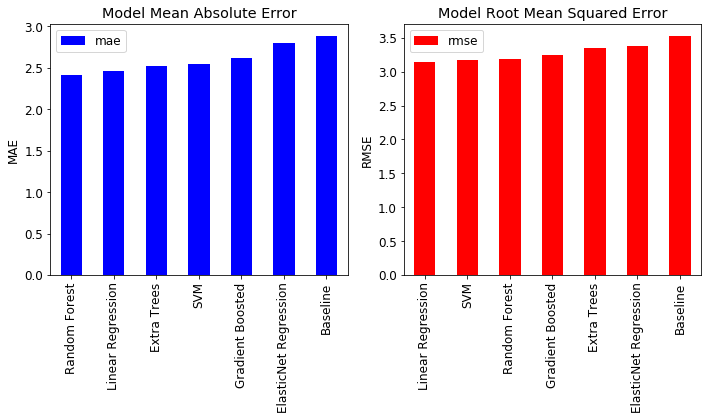

In [20]:
# visual comparison of Models

matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['font.size'] = 12
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

Fortunately, we see that all models best the baseline indicating that machine learning will work for this problem. Overall, the linear regression does slightly better than others.



In [21]:
print('Linear Regression is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Linear Regression', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

Linear Regression is 14.91% better than the baseline.


#### Formula from Ordinary Least Squares Linear Regression
As a final exercise, we can interpret the OLS Linear Regression model. Linear Regression is the simplest machine learning technique, and does not perform well on complex, non-linear problems with lots of features, but it has the benefit of being easily explained. We can extract the prediction formula from the linear regression using the trained model. Following is the formula:

In [22]:
lr = LinearRegression()
lr.fit(X_train.drop(columns='G3'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Grade = 11.14 + -1.00 * failures + -1.06 * schoolsup_yes + 1.06 * schoolsup_no + -0.07 * absences + 0.40 * Medu + -0.33 * Walc'

The intercept, 11.14, represents our guess if every variable of a student is 0. The coefficients (also known as the weights or model parameters) indicate the effect of a unit increase in the respective variable. For example, with every additional previous failure, the student’s score is expected to decrease by 1 points, and with every additional point increase in the mother’s education, the student’s grade increases by 0.4 points. I often like to start off with a linear regression when solving a problem, because if it works well enough, we have a completely explainable model that we can use to make predictions.


### Conclusions
While machine learning gets all the attention, it often comprises a small part of a data science project. Most of the work — and most of the value — comes in obtaining, cleaning, and exploring the data. Only once we have a firm grasp on the structure of our data and the relationships within it should we proceed to building machine learning models. In the first half of this project :
Explored the data to find interesting patterns, trends, or anomalies
Performed feature selection using correlation values
Established a baseline and benchmarked machine learning models



Next, I will implement a Bayesian Linear Regression model using PyMC3 in Python. Build the model, train the model (which in this case means sampling from the posterior), inspect the model for inferences, and make predictions using the results. I

# Implementing Bayesian Regression

Lets have a look at pairs plot of selected variables
from feature selection



C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib

C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.lev

C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\dave_\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib

C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\dave_\Anaconda3\lib\site-packages\matplotlib\contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.lev

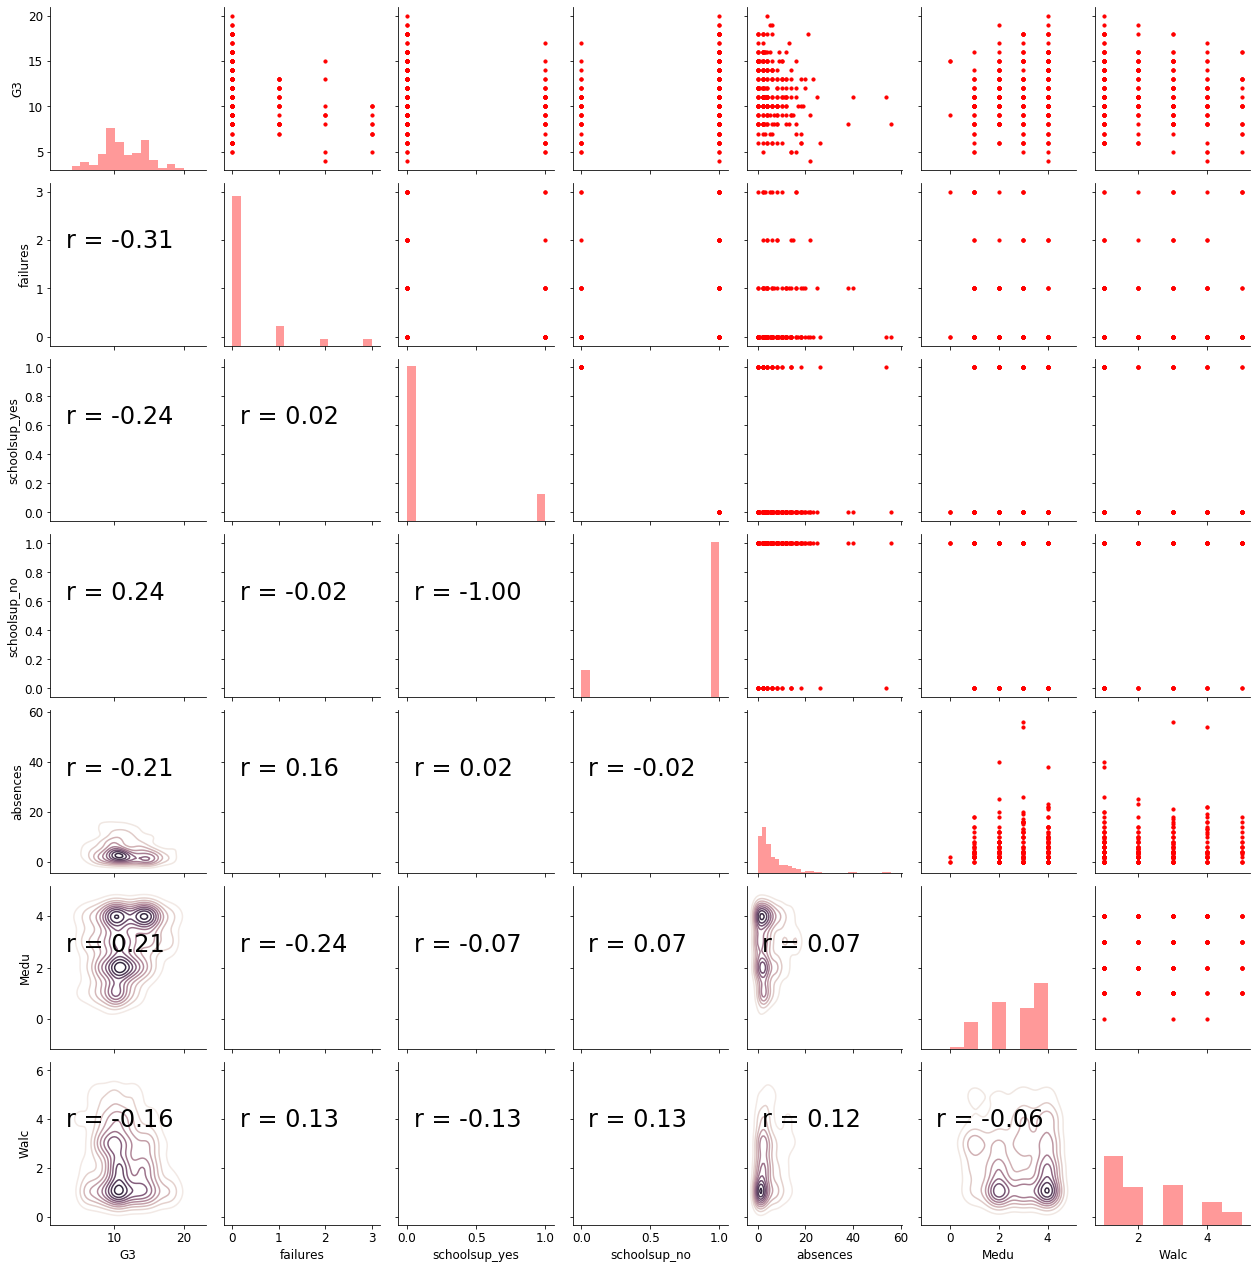

In [23]:
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats


# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

We have 6 features (explanatory variables) that we use to predict the target (response variable), in this case the grade. There are xxx students in the training set and xxx in the test set. To get a sense of the variable distributions (and because I really enjoy this plot) here is a Pairs plot of the variables showing scatter plots, histograms, density plots, and correlation coefficients.




##### Frequentist inference
Frequentist inference is a type of statistical inference that draws conclusions from sample data by emphasizing the frequency or proportion of the data. An alternative name is frequentist statistics. This is the inference framework in which the well-established methodologies of statistical hypothesis testing and confidence intervals are based. Other than frequentistic inference, the main alternative approach to statistical inference is Bayesian inference, while another is fiducial inference.

While "Bayesian inference" is sometimes held to include the approach to inference leading to optimal decisions, a more restricted view is taken here for simplicity.
##### Bayesian inference
Bayesian inference is a method of statistical inference in which Bayes' theorem is used to update the probability for a hypothesis as more evidence or information becomes available.

#### Bayesian Linear Regression
Let’s briefly recap Frequentist and Bayesian linear regression. The Frequentist view of linear regression assumes data is generated from the following model:
<b>y = β T X + e </b>

Where the response, y, is generated from the model parameters, β, times the input matrix, X, plus error due to random sampling noise or latent variables. In the ordinary least squares (OLS) method, the model parameters, β, are calculated by finding the parameters which minimize the sum of squared errors on the training data. The output from OLS is single point estimates for the “best” model parameters given the training data. These parameters can then be used to make predictions for new data points.
In contrast, Bayesian Linear Regression assumes the responses are 
<b>sampled from a probability distribution such as the normal (Gaussian) distribution:</b>

<b>y ~ N(βTX, σ2)</b>


The mean of the Gaussian is the product of the parameters, β and the inputs, X, and the standard deviation is σ. In Bayesian Models, not only is the response assumed to be sampled from a distribution, but so are the parameters. The objective is to determine the posterior probability distribution for the model parameters given the inputs, X, and outputs, y:

The posterior is equal to the likelihood of the data times the prior for the model parameters divided by a normalization constant. If we have some domain knowledge, we can use it to assign priors for the model parameters, or we can use non-informative priors: distributions with large standard deviations that do not assume anything about the variable. Using a non-informative prior means we “let the data speak.” A common prior choice is to use a normal distribution for β and a half-cauchy distribution for σ.

In practice, calculating the exact posterior distribution is computationally intractable for continuous values and so we turn to sampling methods such as Markov Chain Monte Carlo (MCMC) to draw samples from the posterior in order to approximate the posterior. Monte Carlo refers to the general technique of drawing random samples, and Markov Chain means the next sample drawn is based only on the previous sample value. The concept is that as we draw more samples, the approximation of the posterior will eventually converge on the true posterior distribution for the model parameters.
The end result of Bayesian Linear Modeling is not a single estimate for the model parameters, but a distribution that we can use to make inferences about new observations. This distribution allows us to demonstrate our uncertainty in the model and is one of the benefits of Bayesian Modeling methods. As the number of data points increases, the uncertainty should decrease, showing a higher level of certainty in our estimates.
Implementing Bayesian Linear Modeling in Python
The best library for probabilistic programming and Bayesian Inference in Python is currently PyMC3. It includes numerous utilities for constructing Bayesian Models and using MCMC methods to infer the model parameters. We will be using the Generalized Linear Models (GLM) module of PyMC3, in particular, the GLM.from_formula function which makes constructing Bayesian Linear Models extremely simple.
There are only two steps we need to do to perform Bayesian Linear Regression with this module:
Build a formula relating the features to the target and decide on a prior distribution for the data likelihood
Sample from the parameter posterior distribution using MCMC



#### Formula
Instead of having to define probability distributions for each of the model parameters separately, we pass in an R-style formula relating the features (input) to the target (output). Here is the formula relating the grade to the student characteristics:


In [24]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'G3 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'G3 ~ failures + schoolsup_yes + schoolsup_no + absences + Medu + Walc'

In this syntax, ~, is read as “is a function of”. We are telling the model that Grade is a linear combination of the six features on the right side of the tilde.
The model is built in a context using the with statement. In the call to GLM.from_formula we pass the formula, the data, and the data likelihood family (this actually is optional and defaults to a normal distribution). The function parses the formula, adds random variables for each feature (along with the standard deviation), adds the likelihood for the data, and initializes the parameters to a reasonable starting estimate. By default, the model parameters priors are modeled as a normal distribution.
Once the GLM model is built, we sample from the posterior using a MCMC algorithm. If we do not specify which method, PyMC3 will automatically choose the best for us. In the code below, I let PyMC3 choose the sampler and specify the number of samples, 2000, the number of chains, 2, and the number of tuning steps, 500.

In [25]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

# Set number of draws for sampling
NDRAWS = 2000

Now, we can create the model using PyMC3 and perform Markov Chain Monte Carlo to sample from the posterior. The function GLM.from_formula parses the formula string, adds a random variable for each regressor and a likelihood for each random variable which by default is a normal distribution. The function then initializes the parameters (weights, $\beta$) to sensible starting points using a frequentists estimate provided by statsmodels.

After we perform the sampling, we can examine the varibles from the trace to make predictions and examine the weights of different variables. This model is called the normal model because it assumes the features are drawn from normal distributions, an assumption we will alter in a later iteration.

#### GLM - Generalized Linear Model

from https://docs.pymc.io/notebooks/GLM-logistic.html


with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('income ~ age + age2 + educ + hours',
                            data,
                            family=pm.glm.families.Binomial())
    trace = pm.sample(1000, tune=1000, init='adapt_diag')

In [26]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    #linear model and adds a Normal likelihood by default
    family = pm.glm.families.Normal()
    
    # Making the model only requires specifying the formula and the data
    pm.GLM.from_formula(formula, X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=NDRAWS, chains=2, tune = 500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Walc, Medu, absences, schoolsup_no, schoolsup_yes, failures, Intercept]
Sampling 2 chains, 0 divergences: 100%|█| 5000/5000 [10:40<00:00,  7.81draws/s]
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


This model uses relies on PyMC3 for auto-assignment of the sampler. In this case, the model uses the No-UTurn Sampling method (NUTS) which is a special case of Hamiltonian Monte Carlo (HMC)) sampling. Hamiltonian Monte Carlo methods avoid the common random walk behavior of Markov Chain Monte Carlo algorithms by taking steps informed by the first-order gradient. NUTS automatically stops when it begins to double back and retrace steps (No-UTurn) and is generally more efficient than Hamiltonian Monte Carlo which is in turn more efficient than Markov Chain Monte Carlo. HMC converges more quickly than standard MCMC because it avoids the random walk behavior and is an informed sampling method.

##### Examine Bayesian Model Results
Rather than provide us with a single estimate for each of the weights, Markov Chain Monte Carlo sampling gives us a distribution of samples for every model parameter. There are many tools available in PyMC3 for examining the results of a model run. For a start, we can use pm.traceplot to examine the distribution of every variable sampled by the model.

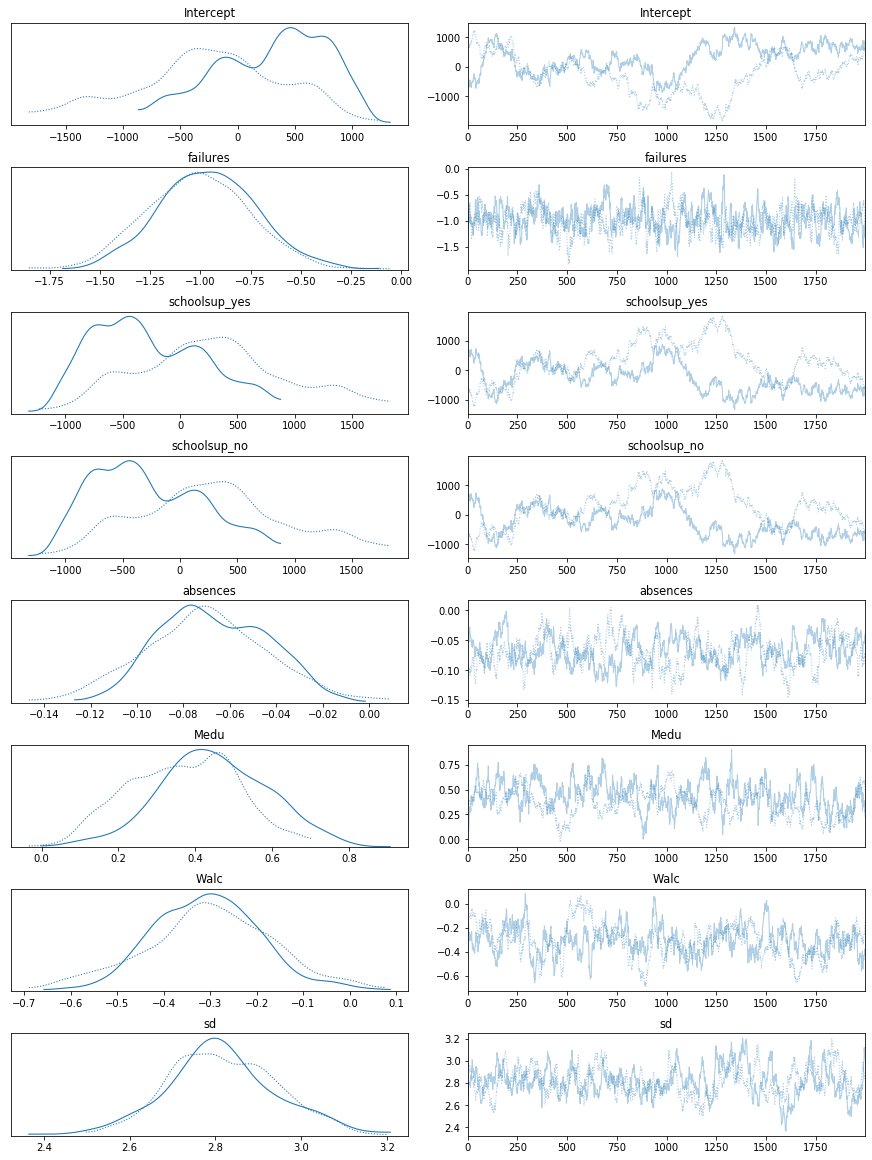

In [27]:
pm.traceplot(normal_trace);

Here we can see that our model parameters are not point estimates but distributions. The mean of each distribution can be taken as the most likely estimate, but we also use the entire range of values to show we are uncertain about the true values.

The left side of the traceplot is the marginal posterior: the values for the variable are on the x-axis with the probability for the variable (as determined by sampling) on the y-axis. The different colored lines indicate that we performed two chains of Markov Chain Monte Carlo. From the left side we can see that there is a range of values for each weight. The right side shows the different sample values drawn as the sampling process runs.

Another method built into PyMC3 for examinig trace results is the forestplot which shows the distribution of each sampled parameter. This allows us to see the uncertainty in each sample. The forestplot is easily constructed from the trace using pm.forestplot.

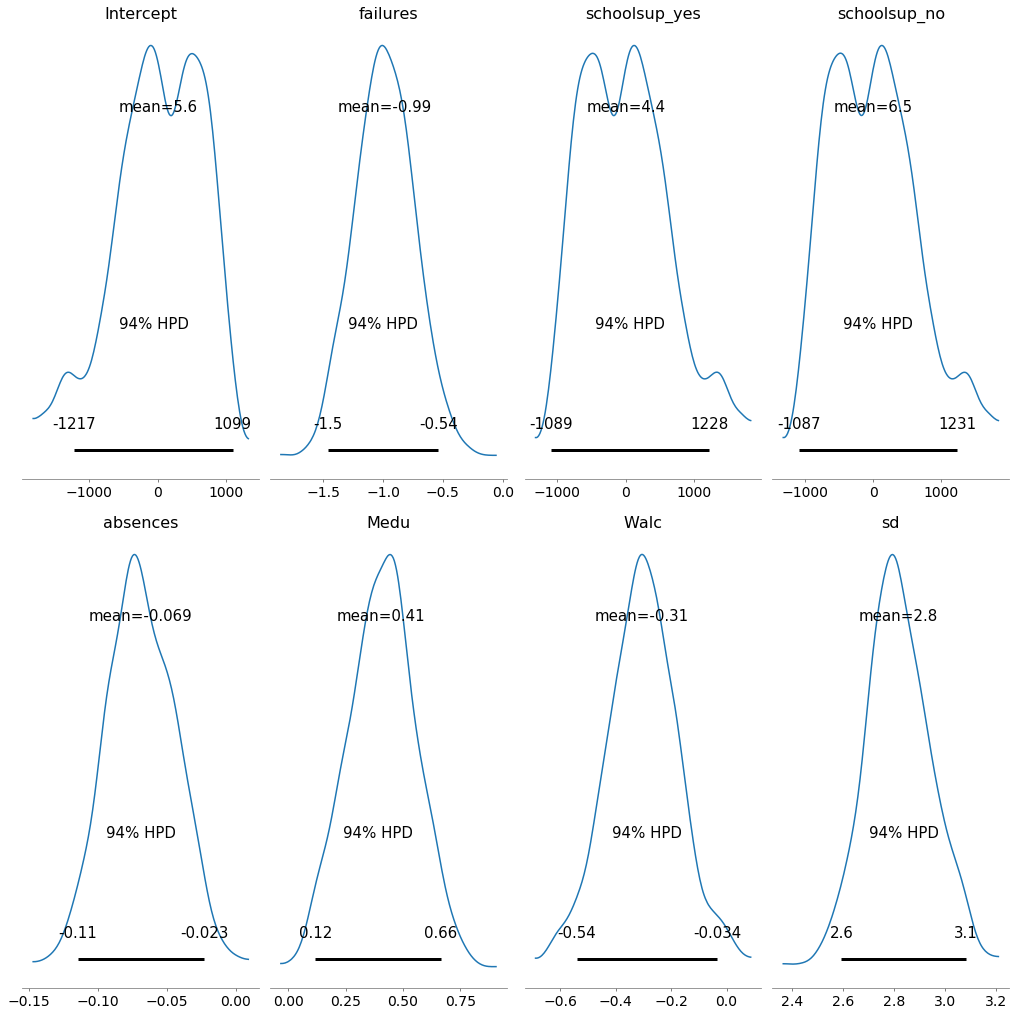

In [37]:
pm.plot_posterior(normal_trace, figsize = (14, 14));

A third method PyMC3 offers for examining the trace of a sampling run is the density plot. This shows the kernel density estimate for each parameter (or the histogram for discrete variables). This again allows us to visualize the distribution of samples.


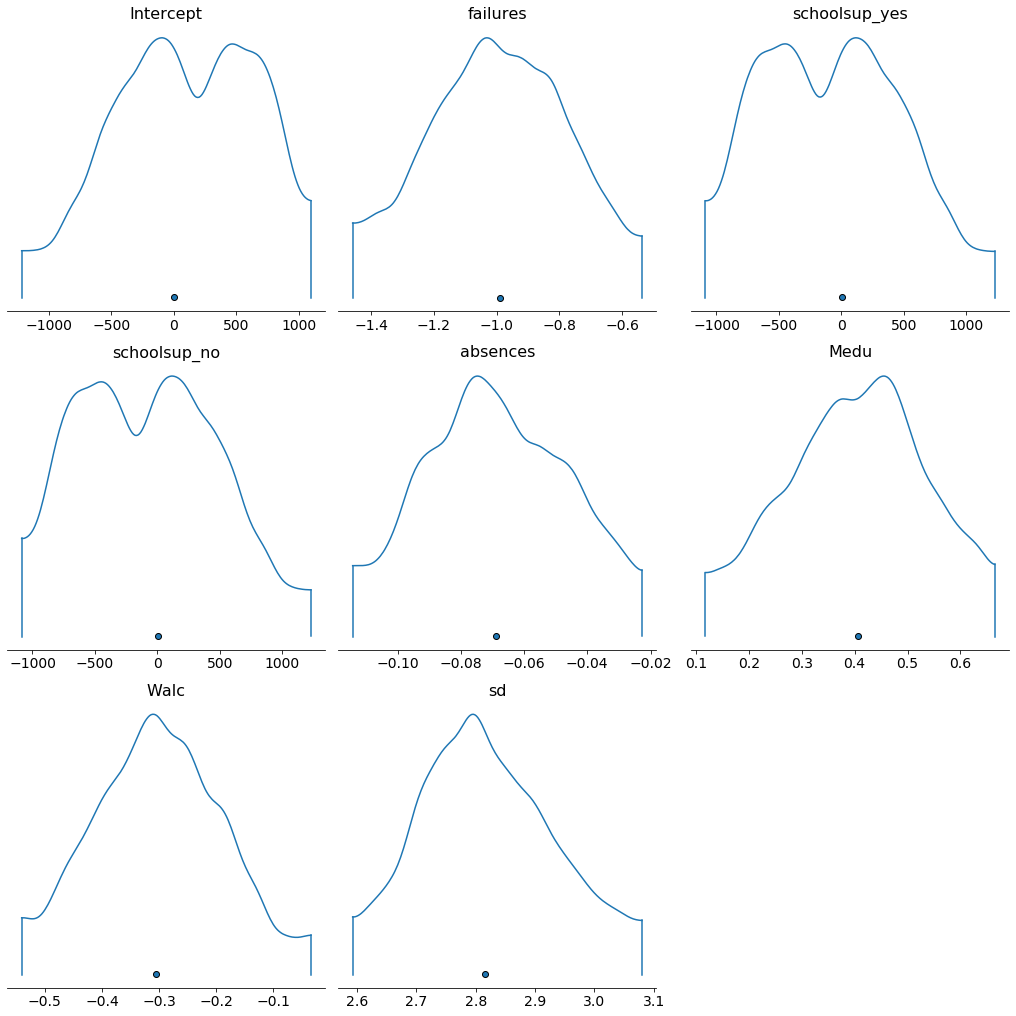

In [38]:
pm.densityplot(normal_trace, figsize = (14, 14));

In [31]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 5.6018
Variable: failures        Mean weight in model: -0.9887
Variable: schoolsup_yes   Mean weight in model: 4.4193
Variable: schoolsup_no    Mean weight in model: 6.5185
Variable: absences        Mean weight in model: -0.0688
Variable: Medu            Mean weight in model: 0.4057
Variable: Walc            Mean weight in model: -0.3051
Variable: sd_log__        Mean weight in model: 1.0342
Variable: sd              Mean weight in model: 2.8158


##### Interpretations of Weights
Based on the sign and location of the weights, we can make the following inferences regarding the features in our dataset:

Previous class failures are negatively related to the students final grade  <br>
The mother's education level is positively related to the students final grade<br>


<br>


##### Linear Formula from Markov Chain Monte Carlo

In [32]:
model_formula = 'y ~ '
for variable in normal_trace.varnames:
    model_formula += '(%0.4f * %s) + ' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-2])

'y ~ (5.6018 * Intercept) + (-0.9887 * failures) + (4.4193 * schoolsup_yes) + (6.5185 * schoolsup_no) + (-0.0688 * absences) + (0.4057 * Medu) + (-0.3051 * Walc) + (1.0342 * sd_log__) + (2.8158 * sd)'

final_equation
'y ~ (181.3136 * Intercept) + (-1.0072 * failures) + (-171.3039 * schoolsup_yes) + (-169.1844 * schoolsup_no) + (-0.0673 * absences) + (0.4072 * Medu) + (-0.3136 * Walc) + (1.0331 * sd_log__) + (2.8126 * sd)'

In [33]:
pm.summary(normal_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,5.602,639.694,-1217.283,1098.568,259.158,192.819,6.0,6.0,6.0,38.0,1.25
failures,-0.989,0.250,-1.459,-0.536,0.021,0.015,139.0,139.0,139.0,294.0,1.02
schoolsup_yes,4.419,639.752,-1088.907,1228.244,259.200,192.852,6.0,6.0,6.0,38.0,1.25
schoolsup_no,6.518,639.774,-1086.545,1230.525,259.205,192.856,6.0,6.0,6.0,38.0,1.25
absences,-0.069,0.025,-0.114,-0.023,0.003,0.002,83.0,83.0,83.0,202.0,1.02
Medu,0.406,0.146,0.118,0.665,0.034,0.024,19.0,19.0,20.0,108.0,1.08
Walc,-0.305,0.129,-0.541,-0.034,0.017,0.012,58.0,58.0,58.0,67.0,1.02
sd,2.816,0.128,2.593,3.080,0.014,0.010,89.0,89.0,88.0,111.0,1.04


#### Evaluate Bayesian Model Using Most Likely Values for Weights
Now, we can make predictions for students outcomes using the trace samples. To come up with a single estimate, we take the mean of all the parameter samples as the single value of the parameter.

In [34]:
print(results)

                           mae     rmse
Linear Regression      2.45821  3.14719
ElasticNet Regression  2.79541  3.37197
Random Forest          2.41015  3.18761
Extra Trees            2.52881  3.34388
SVM                    2.55297  3.17046
Gradient Boosted       2.61838  3.24452
Baseline               2.88889  3.53082


In [35]:
print(normal_trace)

<MultiTrace: 2 chains, 2000 iterations, 9 variables>


### Evaluate Bayesian Model Using Mean of Model Parameters

In [39]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Model  MAE: 2.4640
Model RMSE: 3.1497


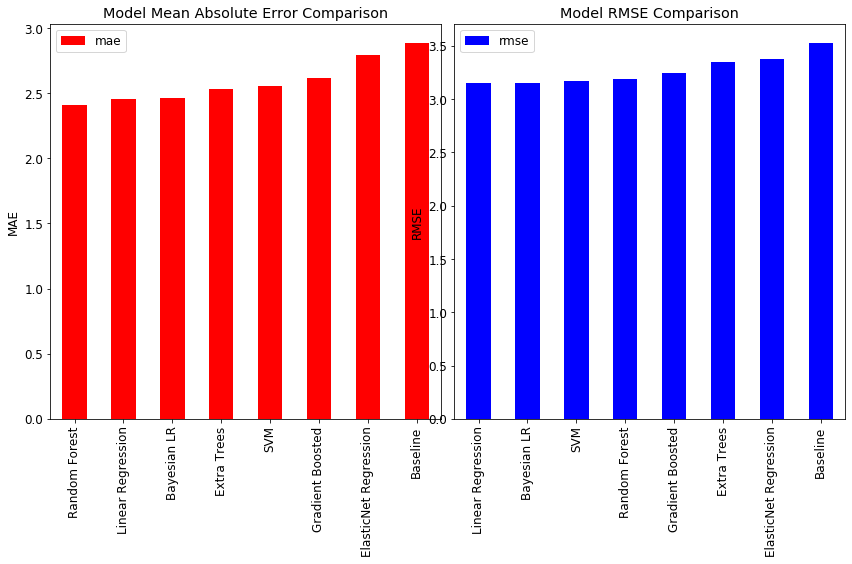

In [40]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)


In [44]:
all_model_results

,mae,rmse
Linear Regression,2.45821,3.14719
ElasticNet Regression,2.79541,3.37197
Random Forest,2.41015,3.18761
Extra Trees,2.52881,3.34388
SVM,2.55297,3.17046
Gradient Boosted,2.61838,3.24452
Baseline,2.88889,3.53082
Bayesian LR,2.46405,3.14966


Bayesian Linear Regression achieves nearly the same performance as the best standard models! However, the main benefits of Bayesian Linear Modeling are not in the accuracy, but in the interpretability and the quantification of our uncertainty. Any model is only an estimate of the real world, and here we have seen how little confidence we should have in models trained on limited data.



#### Interpret Variable Effects
In order to see the effect of a single variable on the grade, we can change the value of this variable while holding the others constant and look at how the estimated grades change. To do this, we use the plot_posterior_predictive function and assume that all variables except for the one of interest (the query variable) are at the median value. We generate a range of values for the query variable and the function estimates the grade across this range by drawing model parameters from the posterior distribution. Here’s the code:

In [51]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
#    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
#    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Grade', size = 16)
    plt.title("Posterior of Grade vs %s" % query_var, size = 18)
    plt.show()

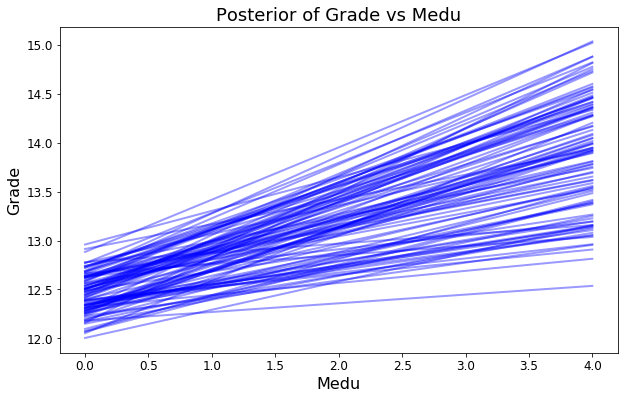

In [52]:

model_effect('Medu', normal_trace, X_train.drop(columns='G3'))

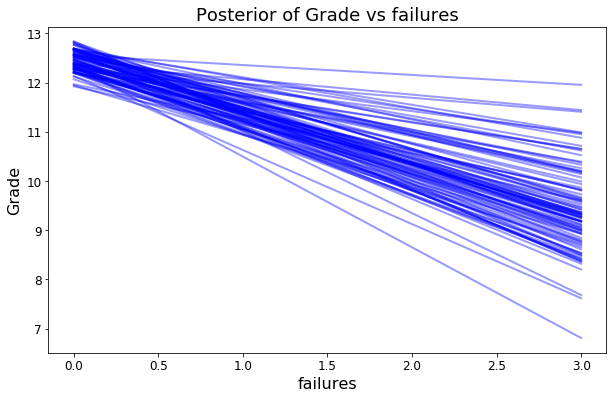

In [53]:
#failures
model_effect('failures', normal_trace, X_train.drop(columns='G3'))

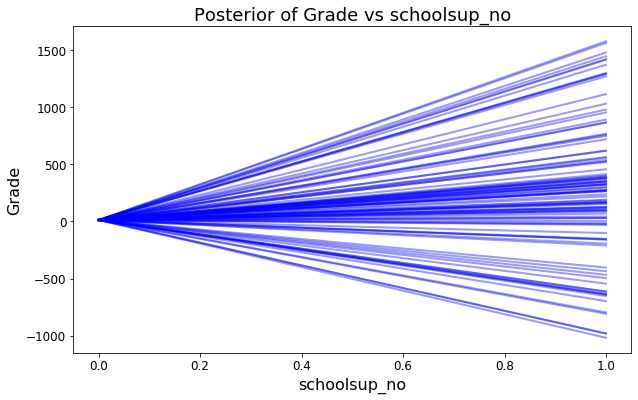

In [55]:
#schoolsup_no
model_effect('schoolsup_no', normal_trace, X_train.drop(columns='G3'))

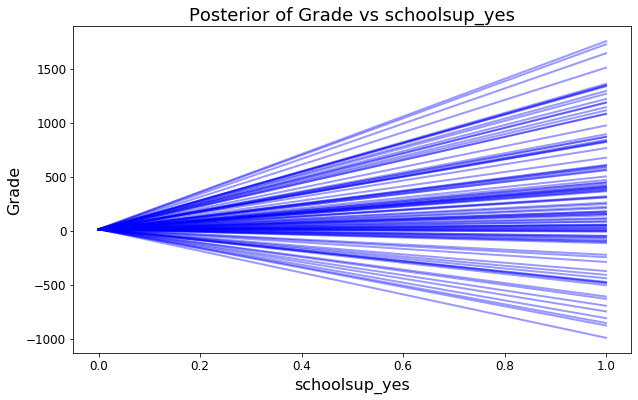

In [56]:
#schoolsup_yes
model_effect('schoolsup_yes', normal_trace, X_train.drop(columns='G3'))

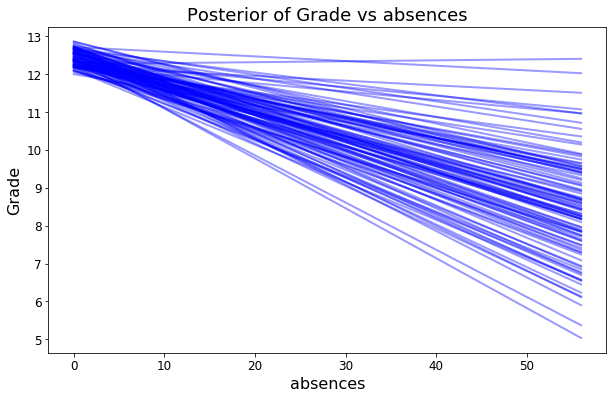

In [57]:
#abcences
model_effect('absences', normal_trace, X_train.drop(columns='G3'))

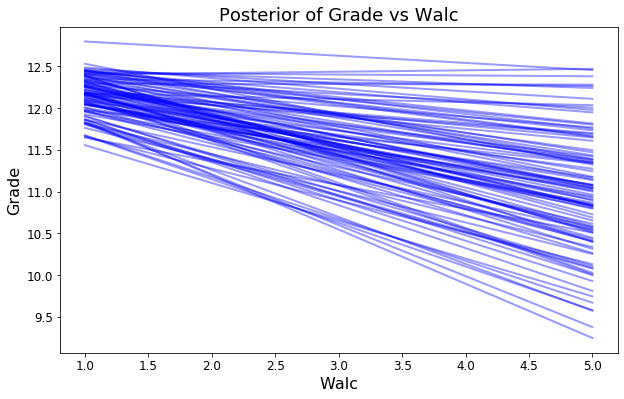

In [58]:
#Walc
model_effect('Walc', normal_trace, X_train.drop(columns='G3'))

## Making Predictions from Model


#### Test Observations
When it comes to predicting, the Bayesian model can be used to estimate distributions. We remember that the model for Bayesian Linear Regression is:
y ~ N(β^T X, σ^2)

Where β is the coefficient matrix (model parameters), X is the data matrix, and σ is the standard deviation. If we want to make a prediction for a new data point, we can find a normal distribution of estimated outputs by multiplying the model parameters by our data point to find the mean and using the standard deviation from the model parameters.
In this case, we will take the mean of each model parameter from the trace to serve as the best estimate of the parameter. If we take the mean of the parameters in the trace, then the distribution for a prediction becomes:

Grade ~ N((5.6018 * Intercept) + (-0.9887 * failures) + (4.4193 * schoolsup_yes) + (6.5185 * schoolsup_no) + (-0.0688 * absences) + (0.4057 * Medu) + (-0.3051 * Walc) + (2.8158^2))


Grade ~ N(9.20 * Intercept - 1.32 * failures + 1.85 * higher_edu + 0.26 * mother_edu + 0.58 * studytime + 0.03 * father_edu - 0.07 * absences,  2.28^2)

For a new data point, we substitute in the value of the variables and construct the probability density function for the grade. As an example, here is an observation from the test set along with the probability density function (see the Notebook for the code to build this distribution):

In [61]:
# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['G3']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('G3')
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure()
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 0.2, 
               linestyles = '--', colors = 'red',
               label = 'True Grade',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 0.2, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Prediction information
    print('True Grade = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

Test Observation:
G3               10
failures          0
schoolsup_yes     0
schoolsup_no      1
absences          4
Medu              1
Walc              4
Intercept         1
Name: 140, dtype: int64


C:\Users\dave_\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


True Grade = 10
Average Estimate = 11.0302
5% Estimate = 6.1855    95% Estimate = 15.9204


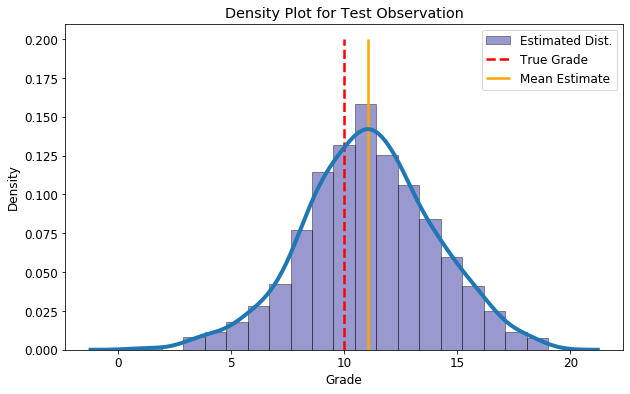

In [65]:
test_model(normal_trace, X_test.iloc[20])

Test Observation:
G3               12
failures          0
schoolsup_yes     0
schoolsup_no      1
absences          2
Medu              3
Walc              2
Intercept         1
Name: 208, dtype: int64
True Grade = 12
Average Estimate = 12.5895
5% Estimate = 7.6835    95% Estimate = 17.0214


C:\Users\dave_\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


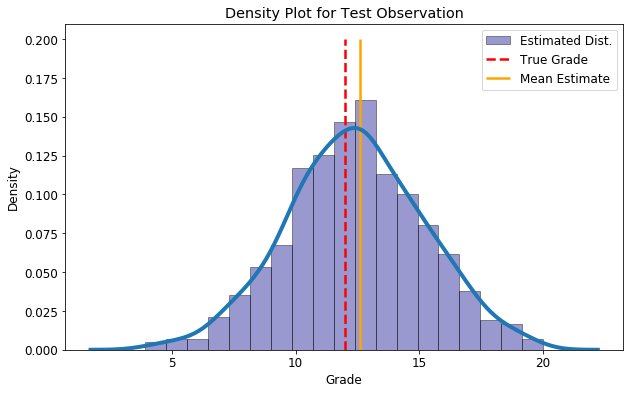

In [67]:
test_model(normal_trace, X_test.iloc[12])

For this data point, the mean estimate lines up well with the actual grade, but there is also a wide estimated interval. If we had more students, the uncertainty in the estimates should be lower.

## Prediction for new Observation


In [69]:
# Make predictions for a new data point from the model trace
def query_model(trace, new_observation):
    
    # Print information about the new observation
    print('New Observation')
    print(new_observation)
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Standard deviation
    sd_value = var_dict['sd'].mean()
    
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Align weights and new observation
    var_weights = var_weights[new_observation.index]
    
    # Means of variables
    var_means = var_weights.mean(axis=0)
    
    # Mean for observation
    mean_loc = np.dot(var_means, new_observation)
    
    # Distribution of estimates
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)
    
    # Plot the estimate distribution
    plt.figure()
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 0.2, 
               linestyles = '-', colors = 'orange', linewidth = 2.5)
    plt.title('Density Plot for New Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Estimate information
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                                             np.percentile(estimates, 95)))

'Grade = 11.14 + -1.00 * failures + -1.06 * schoolsup_yes + 1.06 * schoolsup_no + -0.07 * absences + 0.40 * Medu + -0.33 * Walc'

New Observation
Intercept        1
failures         4
schoolsup_yes    0
schoolsup_no     1
absences         3
Medu             1
Walc             1
dtype: int64
Average Estimate = 8.0594
5% Estimate = 3.8567    95% Estimate = 12.7312


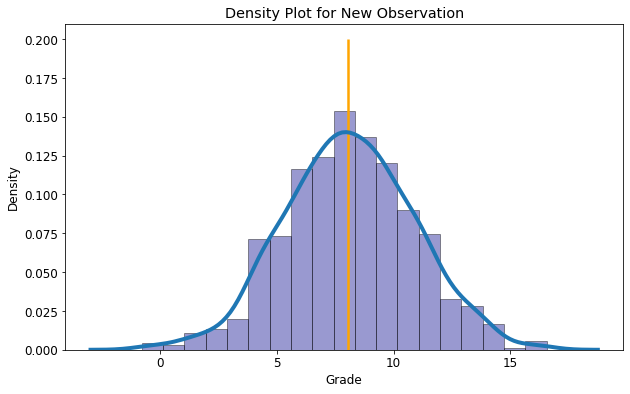

In [70]:
observation = pd.Series({'Intercept': 1, 'failures': 4, 'schoolsup_yes': 0, 
                            'schoolsup_no': 1, 'absences': 3,
                            'Medu': 1, 'Walc': 1})
query_model(normal_trace, observation)

New Observation
Intercept        1
failures         0
schoolsup_yes    0
schoolsup_no     1
absences         1
Medu             4
Walc             1
dtype: int64
Average Estimate = 13.3692
5% Estimate = 8.6309    95% Estimate = 17.7074


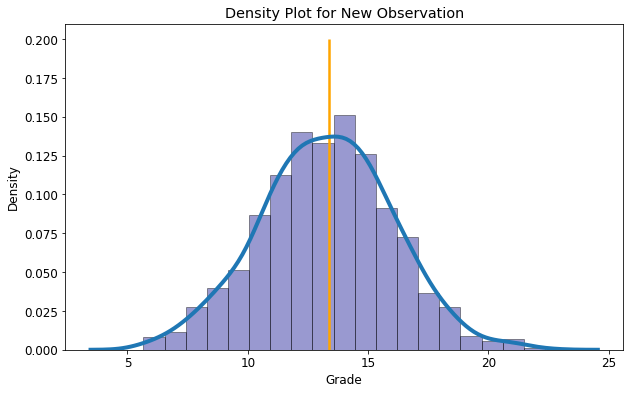

In [71]:
observation = pd.Series({'Intercept': 1, 'failures': 0, 'schoolsup_yes': 0, 
                            'schoolsup_no': 1, 'absences': 1,
                            'Medu': 4, 'Walc': 1})
query_model(normal_trace, observation)

Choosing appropriate priors is one of the hardest aspect of Bayesian Modeling, but we can get around that by having more data. As the amount of data the model learns from increases, the prior has less of an effect because each time the posterior is updated based on the new data. Essentially machine learning models perform inference with no priors, basing the final model entirely on the data. In the case of limited samples, Bayesian Inference can be a better method for building models because it provides a reasonable estimate in situations with few data points (as long as the prior is reasonable).

#### Conclusions
In this notebook we looked at using Bayesian Linear Regression to predict student performance based on six factors. Rather than specify probabilities for the Bayesian network which is basically impossible for continuous variables, we framed the problem as a machine learning task. In addition to the standard machine learning models that learn from observations, we also used Bayesian Linear Regression to create a model mapping the features (student characteristics) to the targets (final grade). The advantages of Bayesian Linear Regression are that if we use sensible priors, we can still get a decent estimate with few samples, and the final weights are not a single number, but a distribution componsed of every sample drawn during the sampling run. We can then make predictions using all the sampled weights to form a distribution of expected values rather than a single answer.

The Bayesian Linear Regression did not perform as well as the other methods in terms of the two metrics we choose. This might not be the ideal case for a Bayesian inference approach but we saw that Bayesian Linear Regression produced intuitive estimates for the model weights and gave predictions for new students that align with our expectations for the factors influencing student performance. To summarize, although Bayesian Linear Regression did not outperform the standard machine learning methods, it gave us a chance to learn another tool for use in evaluating and making sense of data. It's always a positive to have more skills that you can deploy as needed!


Next Steps
For anyone looking to get started with Bayesian Modeling, I recommend checking out the notebook. In this project, I only explored half of the student data (I used math scores and the other half contains Portuguese class scores) so feel free to carry out the same analysis on the other half. In addition, we can change the distribution for the data likelihood—for example to a Student’s T distribution — and see how that changes the model. As with most machine learning, there is a considerable amount that can be learned just by experimenting with different settings and often no single right answer!

http://www.statisticshowto.com/probability-and-statistics/t-distribution/